In [1]:
from knowknow.datastore import *

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
top100 = biggest_cits(filt=FILT.big3america, what=Cit.author, N=100)
top100 = [x[0] for x in top100]

In [4]:
dd = count_docs(
    filt=FILT.big3america + [(Cit.author, top100[:15])], 
    by={"a":Cit.author, "y":Doc.year}
)

In [5]:
dd_decade = dd.groupby([(dd.y//10)*10, dd.a])['count'].sum().reset_index()

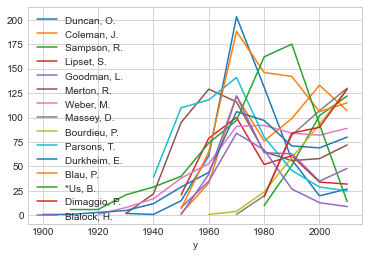

In [6]:
fig, ax = plt.subplots()
for auth in set(dd['a']):
    dd_decade[dd_decade.a==auth].plot('y','count', label=auth, ax=ax)
plt.show()

In [7]:
print("Top authors:")
print()
print(" ".join("<%s>"%x for x in top100))

Top authors:

<*Us, B.> <Blau, P.> <Parsons, T.> <Weber, M.> <Coleman, J.> <Durkheim, E.> <Duncan, O.> <Merton, R.> <Massey, D.> <Sampson, R.> <Goodman, L.> <Bourdieu, P.> <Blalock, H.> <Lipset, S.> <Dimaggio, P.> <Tilly, C.> <Mcadam, D.> <Goffman, E.> <Granovetter, M.> <Sewell, W.> <Portes, A.> <Meyer, J.> <Lieberson, S.> <Becker, G.> <Hannan, M.> <Wilson, W.> <Burt, R.> <Allison, P.> <*Us, D.> <Davis, J.> <Hauser, R.> <Kohn, M.> <Homans, G.> <Simmel, G.> <Park, R.> <Becker, H.> <England, P.> <Lenski, G.> <Ridgeway, C.> <Farley, R.> <Stinchcombe, A.> <Glenn, N.> <Gamson, W.> <Marx, K.> <Kalleberg, A.> <Alba, R.> <Berger, J.> <Turner, R.> <Logan, J.> <Skocpol, T.> <Mccarthy, J.> <Collins, R.> <White, H.> <Reskin, B.> <Warner, W.> <Snow, D.> <Davis, K.> <Hawley, A.> <Elder, G.> <Gibbs, J.> <Lazarsfeld, P.> <Jencks, C.> <Featherman, D.> <Hagan, J.> <Marsden, P.> <Sorokin, P.> <Wright, E.> <Fligstein, N.> <Abbott, A.> <South, S.> <Laumann, E.> <Fischer, C.> <Giddens, A.> <Stark, R.> <Hout

In [8]:
from random import choice
to_examine = choice(top100)

In [9]:
to_examine = "Reskin, B."

In [10]:
print(to_examine)

Reskin, B.


In [11]:
mydocs = count_cits(
    filt=[(Cit.author, to_examine)], #+FILT.big3america 
    by={"ref":Cit.full_ref, "y":Doc.year},
    min_count=5
)

In [12]:
cited_works = set(mydocs.ref)

In [13]:
def year_sequences(docs, by=None, min_year=1950, max_year=2020):
    from collections import defaultdict
    # just group by __everything__, if not otherwised specified
    if by is None:
        by = set(docs.columns).difference({'count','y'})
        by = [getattr(docs, x) for x in by]
        
    ret = []
    for name, counts in docs.groupby(by):
        cy = defaultdict(int, {x.y: x['count'] for i, x in counts.iterrows()})
        cy = [cy[yy] for yy in range(min_year,2020)]
        ret.append( (name, cy) )
        
    return ret

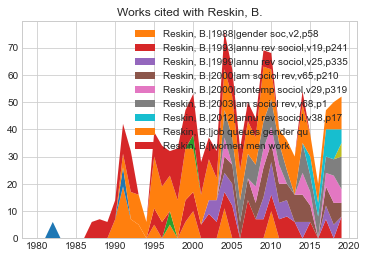

In [22]:
cy = year_sequences(mydocs, min_year=1980)

plt.stackplot(
    range(1980,2020),
    *[x[1] for x in cy], 
    labels=[x[0] if sum(x[1]) > 20 else None for x in cy]
);
plt.title("Works cited with %s" % to_examine)
plt.legend();

In [26]:
FILT.big3america

[(<CharField: Doc.journal>,
  ['american journal of sociology',
   'american review of sociology',
   'social forces'])]

In [23]:
import networkx as nx

In [24]:
def plot_g(G):
    # I can't figure out how, but the edges should be colored / sized by their LOG(weight)

    nodes = G.nodes()
    degree = G.degree(weight=True)
    #print(degree)
    colors = np.array([degree[n] for n in nodes])
    colors = 250*colors / np.max(colors)
    #size = [(degree[n]) for n in nodes]

    pos = nx.kamada_kawai_layout(G)
    #pos = nx.spring_layout(G, k = 0.2)
    cmap = plt.cm.viridis_r
    cmap = plt.cm.Greys

    vmin = min(colors)
    vmax = max(colors)

    fig = plt.figure(figsize = (5,5), dpi=100)
    nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
    nx.draw_networkx_labels(G,pos,font_color='w',font_size=10)
    fig.set_facecolor('#0B243B')

    plt.show()

In [25]:
g = bib_network(
    filt = [(Cit1.author, top100[:10]), (Cit2.author, top100[:10])],
    cited_ent = 'author'
)

c:\users\amcga\envs\citation-deaths\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


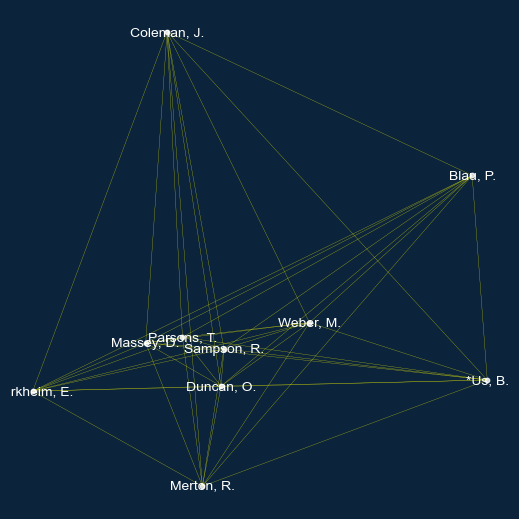

In [26]:
plot_g(g)

In [55]:
# grab an egonet

g2 = bib_network(
    filt = [(Cit1.author, to_examine)],
    cited_ent = 'author',
    min_cocit = 100
)

In [56]:
len(g2.nodes)

176

In [66]:
# random hundo and plot the subnetworks there...
# problem: can't filter by more than 999 entities...

from random import sample
#to_network = sample(g2.nodes, 100)
to_network = list(g2.nodes)

g3 = bib_network(
    filt = [(Cit1.author, to_network),(Cit2.author, to_network)],
    cited_ent = 'author',
    min_cocit = 10
)

In [84]:
nx.write_graphml(g3, '%s.graphml'%to_examine)

In [68]:
nnodes = len(nx.nodes(g3))

In [75]:
maxw = max(x[1] for x in list(nx.degree(g3, weight='weight')))

In [73]:
min(x[1] for x in list(nx.degree(g3, weight='weight')))

1035

In [78]:
large_degree = [x for x,c in nx.degree(g3, weight='weight') if c > maxw/10]

g3.remove_nodes_from( large_degree )

arghhhhh networks are hard...

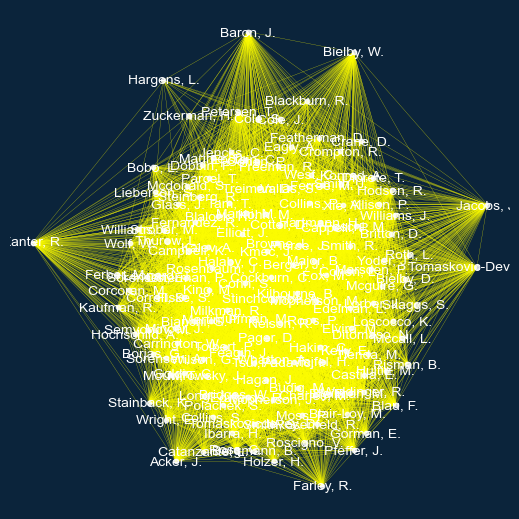

In [83]:
plot_g(g3)